In [1]:
import seaborn as sns
df=sns.load_dataset('tips')

In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
print(df.describe)

<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No Null values present

In [8]:
df.shape

(244, 7)

In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
# Summary of Data
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [11]:
from matplotlib import pyplot as plt

### Relationship between Total Bill, Tip, and Smoker Status

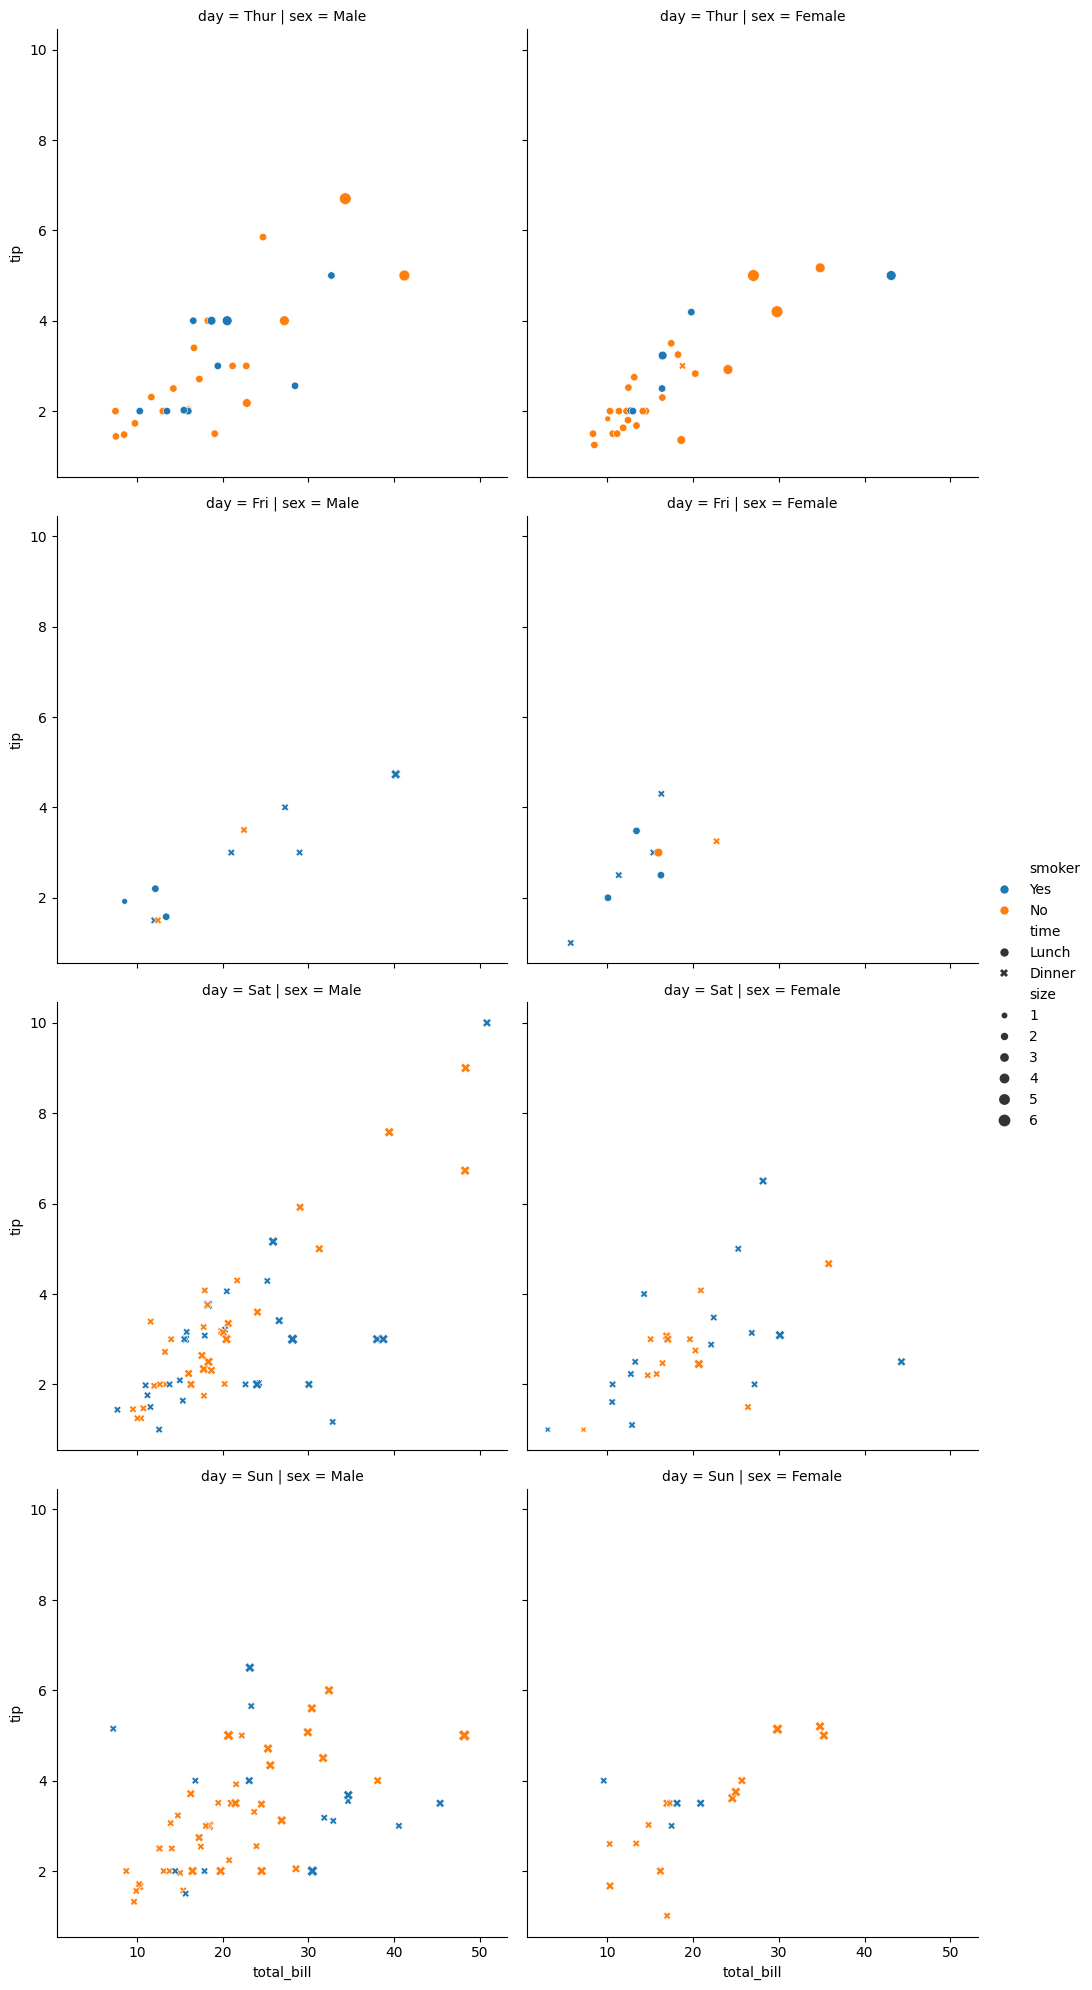

In [12]:
sns.relplot(x = 'total_bill',y = 'tip',data = df,
            hue = 'smoker',size = 'size',style = 'time',
            row = 'day',col = 'sex')
plt.show()

### Total Bill distribution
This distribution plot would show the distribution of total bill amounts across all transactions. It helps in understanding the range and frequency of bill amounts.

<Figure size 800x600 with 0 Axes>

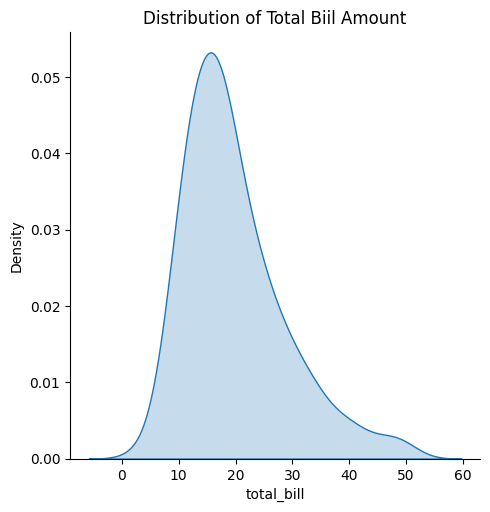

In [13]:
plt.figure(figsize=(8,6))
sns.displot(x = 'total_bill',data = df,
            kind = 'kde',fill=True)
plt.title("Distribution of Total Biil Amount")
plt.show()

### Distribution of Tips Gender and Smoker Status
This plot will show the distribution of tips by gender, with separate boxes for smokers and non-smokers. It helps visualize how tip amounts vary across different groups, providing insights into tipping behavior based on gender and smoker status

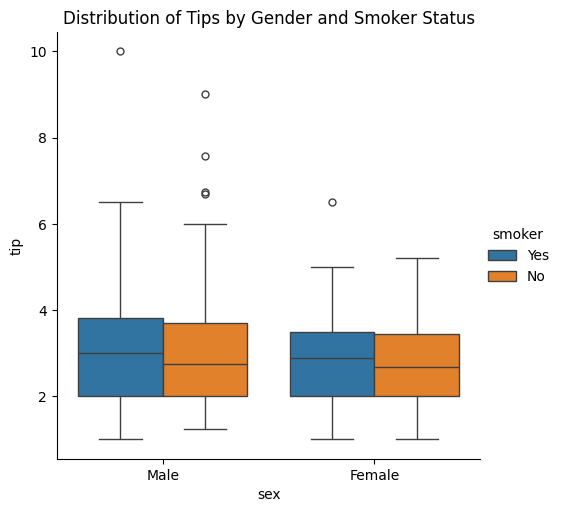

In [14]:
sns.catplot(x = 'sex',y = 'tip',data=df,
            kind = 'box',hue = 'smoker')
plt.title('Distribution of Tips by Gender and Smoker Status')
plt.show()

### Avearge Total Bill Amount
Grouping the data by the day of the week, you can create a bar chart showing the average tip amount for each day. This helps in understanding tipping behavior across different days.

C:\Users\Amreet\AppData\Local\Temp\ipykernel_39644\3878360340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index() # Group data by day and calculate average tip amount


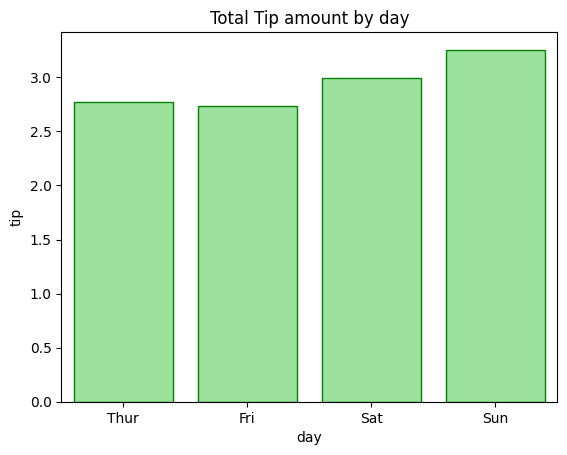

In [15]:
avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index() # Group data by day and calculate average tip amount
avg_tip_by_day = avg_tip_by_day.sort_values(by='day') # Sort the DataFrame by day

sns.barplot(x=avg_tip_by_day['day'],y=avg_tip_by_day['tip'],color='lightgreen',edgecolor='green')
plt.title('Total Tip amount by day')

plt.show()

### Smoking vs. Non-Smoking Customers
Show the proportion of smoking and non-smoking customers in a pie chart. This gives a quick overview of the smoking demographics in the dataset.

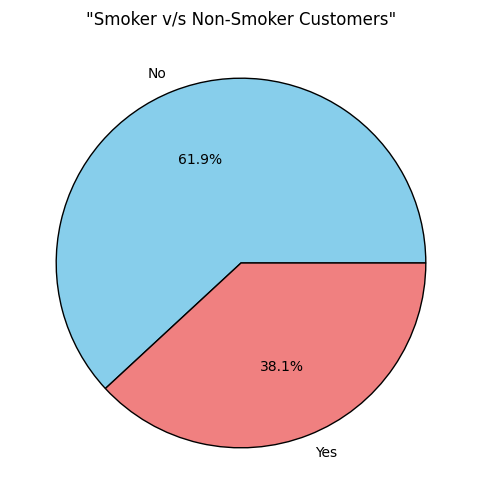

In [16]:
smoker_counts = df['smoker'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(smoker_counts,labels=smoker_counts.index,autopct= '%1.1f%%',colors=['skyblue','lightcoral'],wedgeprops={'edgecolor':'black'})
plt.title('"Smoker v/s Non-Smoker Customers"')
plt.axis('on')

plt.show();

### Total Bill Amount by Day and Time
Using a heatmap, you can visualize the total bill amounts based on both the day of the week and the time of day. This can reveal peak hours and busy days for the restaurant.

C:\Users\Amreet\AppData\Local\Temp\ipykernel_39644\556822847.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_tip = df.pivot_table(index='day',columns ='time',values ='total_bill')


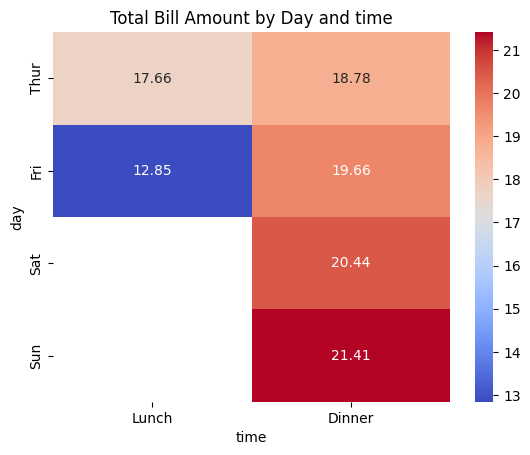

In [17]:
pivot_tip = df.pivot_table(index='day',columns ='time',values ='total_bill')

sns.heatmap(pivot_tip,cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Total Bill Amount by Day and time')
plt.show()


### Total Bill Amount by Day and Gender
Grouping the data by both day of the week and gender, create a stacked bar chart showing the total bill amounts, with different segments representing each gender. This can reveal spending patterns by gender on different days.

C:\Users\Amreet\AppData\Local\Temp\ipykernel_39644\1112863300.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bill_by_day_gender = df.groupby(['day','sex'])['total_bill'].sum().reset_index()


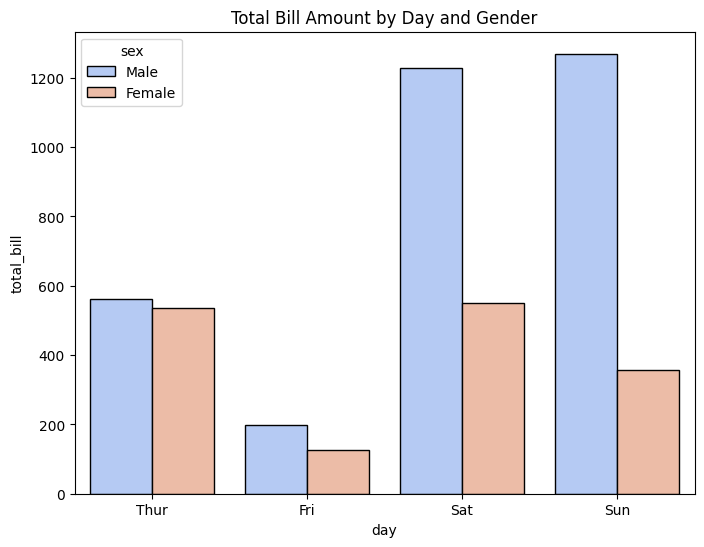

In [18]:
plt.figure(figsize=(8,6))
total_bill_by_day_gender = df.groupby(['day','sex'])['total_bill'].sum().reset_index()

sns.barplot(x='day',y='total_bill',hue='sex',
            data=total_bill_by_day_gender,
            palette='coolwarm',edgecolor='black')
plt.title("Total Bill Amount by Day and Gender")
plt.show()

### Key Takeaways:
- Positive Correlation: Higher total bills tend to result in larger tip amounts, indicating that customers generally tip proportionally to the total cost of their meal.
- Gender Differences: There are slight variations in tipping behavior between genders, with males tending to leave slightly larger tips on average compared to females.
- Smoking Status: Smoking status does not appear to have a significant impact on tipping behavior.
- Day and Time Effects: Tipping patterns vary across different days of the week and times of day, with weekends and dinner times generally associated with higher tip amounts.
- Party Size: Larger dining parties may leave smaller tips per person compared to smaller parties, suggesting a potential need for adjustments in service or gratuity expectations for larger groups.